In [6]:
## import packages and modules
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
# show plots inline
%matplotlib inline
## dataset path
filename = r'D:\wkspacePY\STA 141C\data\data.csv'
# processed data output path
file_name = r'D:\wkspacePY\STA 141C\data\processed.csv'
## set default figure size
figure_size = (15,10)

In [7]:
## load dataset
# set column 'shot_id' as index because it is subjective and unique
# parse the dates in column 'game_date'
df = pd.read_csv(filename, index_col='shot_id')
# list all features
columns = df.columns.values
print(columns)

['action_type' 'combined_shot_type' 'game_event_id' 'game_id' 'lat'
 'loc_x' 'loc_y' 'lon' 'minutes_remaining' 'period' 'playoffs' 'season'
 'seconds_remaining' 'shot_distance' 'shot_made_flag' 'shot_type'
 'shot_zone_area' 'shot_zone_basic' 'shot_zone_range' 'team_id'
 'team_name' 'game_date' 'matchup' 'opponent']


In [8]:
## columns not needed
notNeeded = []

In [9]:
df = df[df['shot_made_flag'].notnull()]

In [10]:
#Action type column
print(df['action_type'].unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

In [11]:
for elem in df['action_type'].unique():
    df[str(elem)] = (df['action_type'] == elem).astype(int)
notNeeded.append('action_type')

In [12]:
#Combined shot type 
print(df['combined_shot_type'].unique())

['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


In [13]:
for elem in df['combined_shot_type'].unique():
    df[str(elem)] = (df['combined_shot_type'] == elem).astype(int)
notNeeded.append('combined_shot_type')

In [14]:
#game event and game IDs not needed
notNeeded.extend(['game_event_id','game_id'])

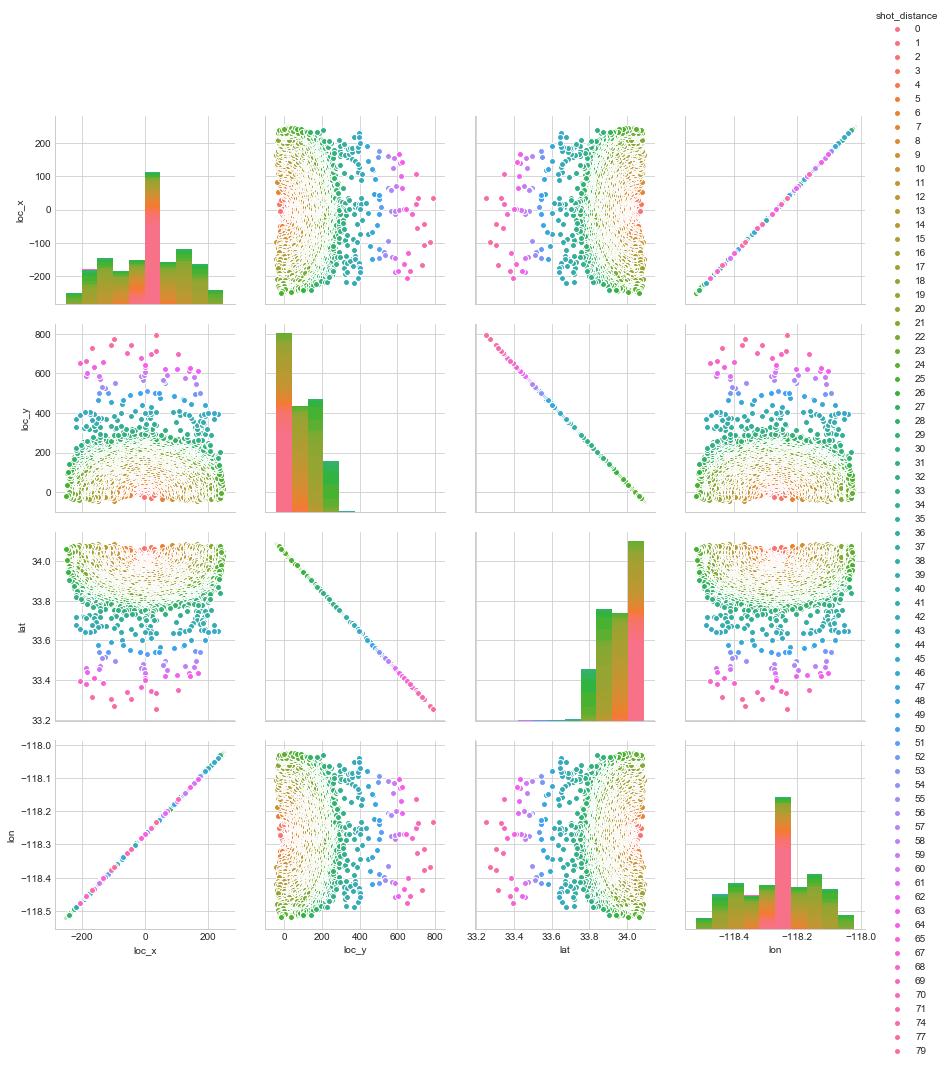

In [15]:
#loc_x,loc_y,lat,lon
sns.set_style('whitegrid')
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_distance',size = 3)

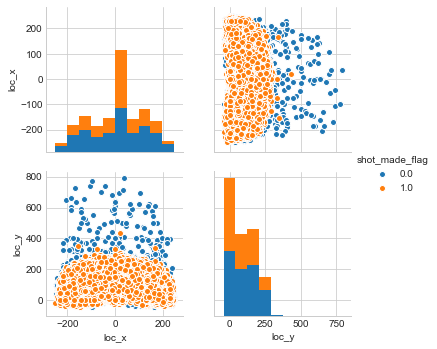

In [16]:
#loc_x,loc_y,lat,lon
sns.set_style('whitegrid')
sns.pairplot(df, vars=['loc_x', 'loc_y'], hue='shot_made_flag')

In [17]:
#loc_x and lon are correlated, also loc_y and lat, so we'll drop lon and lat.
notNeeded.extend(['lon','lat'])

In [18]:
# minutes_remaining and seconds_remaining can be put in one column named time_remaining.
df['timeRemaining'] = 60 * df.loc[:,'minutes_remaining'] + df.loc[:,'seconds_remaining']

In [19]:
notNeeded.extend(['minutes_remaining','seconds_remaining'])

In [20]:
#Season
#In season column, we'll just keep the year when season started
df['season'] = df['season'].apply(lambda x: x[:4])
#convert column to integer.
df['season'] = pd.to_numeric(df['season'])

In [21]:
#Shot distance
#Seems like shot_distance is just floored distance calculated from x- and
# y- location of a shot, so we'll use more precise measure and drop floored one.
distance = pd.DataFrame({'trueDistance': np.sqrt((df['loc_x']/10)** 2
                        + (df['loc_y']/10) ** 2),
                       'shotDistance': df['shot_distance']})
distance[:5]
df['shotDistance'] = distance['trueDistance']
notNeeded.append('shot_distance')

In [22]:
#shot type
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [23]:
# We can create a new column 3pt_goal which will have values 1 for 3pt goal
# and 0 for 2pt goal, and then drop shot_type column.
df['3ptGoal'] = df['shot_type'].str.contains('3PT').astype('int')
notNeeded.append('shot_type')

In [24]:
#Shot zone: range,area,basic
print(df['shot_zone_range'].unique())
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [25]:
#shot_zone_range is just putting shot_distance in 5 bins. Don't need it.
notNeeded.append('shot_zone_range')

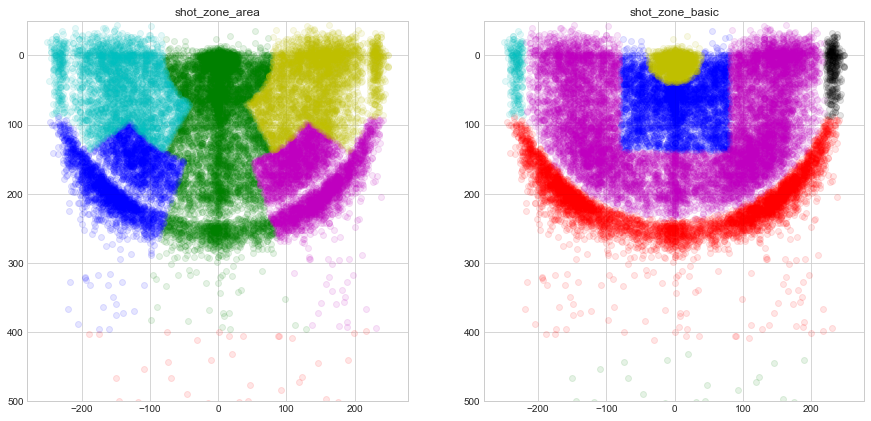

In [26]:
#Let's visualize shot_zone_area and shot_zone_basic.
#We'll put loc_y = 0 near the top, so right and left sides show correctly in the graph.
areaGroup = df.groupby('shot_zone_area')
basicGroup = df.groupby('shot_zone_basic')
plt.subplots(1,2,figsize = (15,7),sharey = True)
colors = list('rgbcmyk')
plt.subplot(121)
plt.ylim(500,-50)
plt.title('shot_zone_area')
for i,(_,area) in enumerate(areaGroup):
    plt.scatter(area['loc_x'],area['loc_y'],alpha = 0.1,color = colors[i])
    
plt.subplot(122)
plt.ylim(500,-50)
plt.title('shot_zone_basic')
for i,(_,basic) in enumerate(basicGroup):
    plt.scatter(basic['loc_x'],basic['loc_y'],alpha = 0.1,color = colors[i])

In [27]:
for elem in df['shot_zone_area'].unique():
    df[str(elem)] = (df['shot_zone_area'] == elem).astype(int)
notNeeded.append('shot_zone_area')
for elem in df['shot_zone_basic'].unique():
    df[str(elem)] = (df['shot_zone_basic'] == elem).astype(int)
notNeeded.append('shot_zone_basic')

In [28]:
#Team ID and name
notNeeded.extend(['team_id','team_name'])

In [29]:
#Game date
#We'll convert game_date to datetime format, and then split it to year, month and weekday (0 = Monday, 6 = Sunday), so it won't be needed anymore.
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek
notNeeded.append('game_date')

In [30]:
#Matchup and opponent
#matchup and opponent columns give as almost the same data - matchup tells us if the game was home or away (depending if it is '@' or 'vs'), so we'll make a new column with that info and then we can drop matchup column.
df['homeGame'] = df['matchup'].str.contains('vs').astype(int)
notNeeded.append('matchup')

In [31]:
for elem in df['opponent'].unique():
    df[str(elem)] = (df['opponent'] == elem).astype(int)
notNeeded.append('opponent')

In [32]:
#Exploring the columns - summary
#Let's finally drop all not needed columns:
df = df.drop(notNeeded,axis=1)

In [33]:
#Splitting the data
#ignore the data where 'shot_made_flag'==null
# train/test = 8/2
percentile = 0.2
train_set, test_set = train_test_split(df, test_size = percentile)
train_set.shape

(20557, 117)

In [34]:
train_set.head(10)

,loc_x,loc_y,period,playoffs,season,shot_made_flag,Jump Shot,Driving Dunk Shot,Layup Shot,Running Jump Shot,...,CHA,WAS,ORL,ATL,MEM,BOS,NOH,NOP,OKC,BKN
shot_id,,,,,,,,,,,,,,,,,,,,,
23836,29,261,4,0,1997,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19692,-120,99,2,0,2012,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15320,-100,227,1,0,2009,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25231,-31,33,3,0,1999,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23056,0,0,2,0,1996,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19755,48,12,4,0,2012,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20799,-149,1,1,0,2012,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23729,55,147,4,0,1997,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10594,0,-6,3,0,2006,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
df.to_csv(file_name, sep=',', encoding='utf-8')